In [1]:
%matplotlib inline 

In [2]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from scipy.stats import zscore
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

In [3]:
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [4]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
df= df.drop(['ID', 'ZIP Code'], axis=1)

In [6]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


In [8]:
df.shape

(5000, 12)

C:\Users\sharan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\sharan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


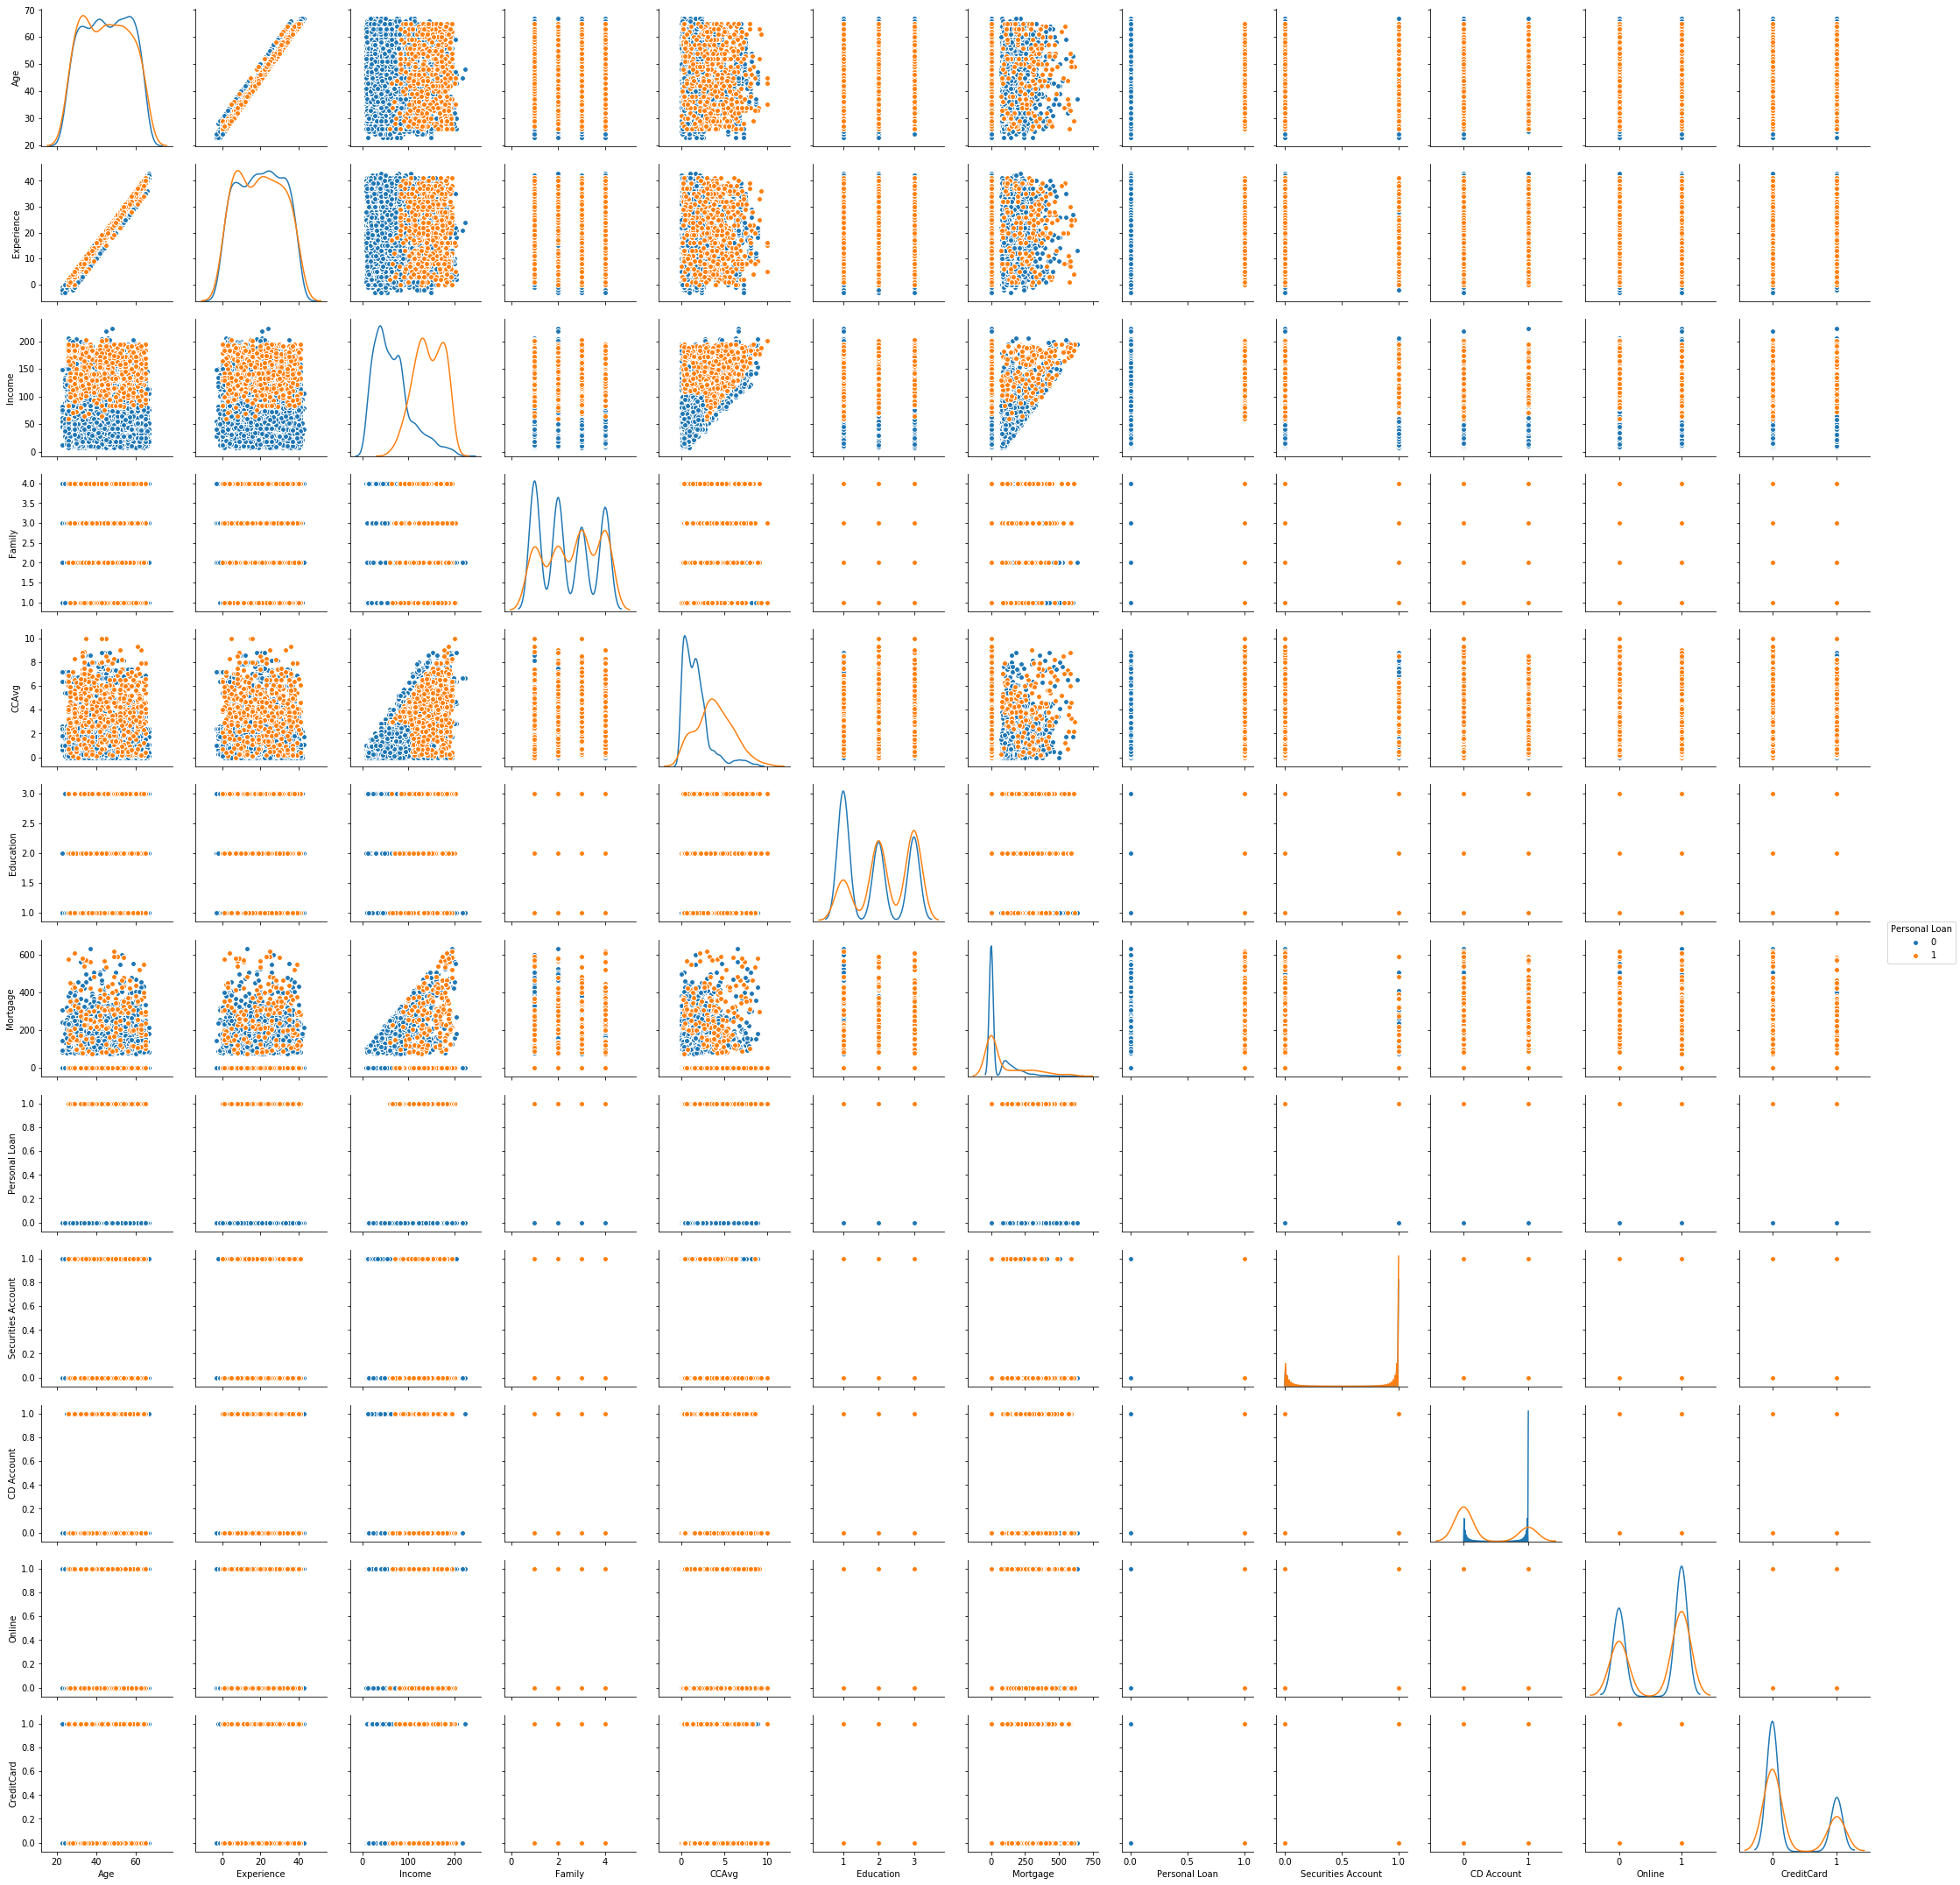

In [9]:
sns.pairplot(df , diag_kind = "kde", hue="Personal Loan");

In [24]:
print("From the above pictorial analysis we can observe the following:\n1.Age and experience has not much impact on if the person chose personal loan or not")
print("2.As income and Education increases the tendency to go for personal loan has increased")
print("3.Rest of the features have similar impact for both those who took the loan anad those who didnt take the loan.")

From the above pictorial analysis we can observe the following:
1.Age and experience has not much impact on if the person chose personal loan or not
2.As income and Education increases the tendency to go for personal loan has increased
3.Rest of the features have similar impact for both those who took the loan anad those who didnt take the loan.


In [10]:
df.shape

(5000, 12)

In [11]:
print( df[df['Personal Loan'] == 1].shape[0])

480


The number of people accepted the personal loan on previous call is less than 10 % of the total dataset. The data is highly biased towards people who rejected the personal loan.

In [12]:


X =  df.drop("Personal Loan", axis=1)
y =  df.pop("Personal Loan")

In [13]:
train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=1)

In [14]:
#Naive bayes model
model = GaussianNB()
model.fit(train_set, train_labels)

GaussianNB(priors=None)

In [15]:
model.score(train_set , train_labels) 

0.89

In [16]:
test_pred = model.predict(test_set)
print(metrics.classification_report(test_labels, test_pred))
print(metrics.confusion_matrix(test_labels, test_pred))

             precision    recall  f1-score   support

          0       0.95      0.91      0.93      1351
          1       0.41      0.56      0.47       149

avg / total       0.90      0.87      0.88      1500

[[1228  123]
 [  65   84]]


In [17]:
#K-NN model

NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [18]:

NNH.fit(train_set, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [19]:
predicted_labels = NNH.predict(test_set)
NNH.score(test_set, test_labels)

0.9093333333333333

In [20]:

print(metrics.confusion_matrix(test_labels, predicted_labels))

[[1309   42]
 [  94   55]]


In [21]:
#Logistic Regression

Y = y
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)

pandas.core.frame.DataFrame

In [22]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.9533333333333334
[[1342   20]
 [  50   88]]


In [25]:
print("Logistic Regeression provides the highest accuracy score. This shows that the result is linear rather than in cluster as can be observed in K-NN model and the data is not as independent of each other as assumed by Naive Bayes.")

Logistic Regeression provides the highest accuracy score. This shows that the result is linear rather than in cluster as can be observed in K-NN model and the data is not as independent of each other as assumed by Naive Bayes.
